In [2]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import os, yaml, sys
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from sampling.utils import compute_prob 
from sampling.sampling_comparisons import kld_calc

In [3]:
ran_feats_path = f"{paths["results_path"]}/imagenet_val_alexnet_classifier.2_ran_features.pkl"

In [4]:
data = joblib.load(ran_feats_path)

In [32]:
var = np.var(data, axis=0)
m = np.mean(data, axis=0)

<BarContainer object of 30 artists>

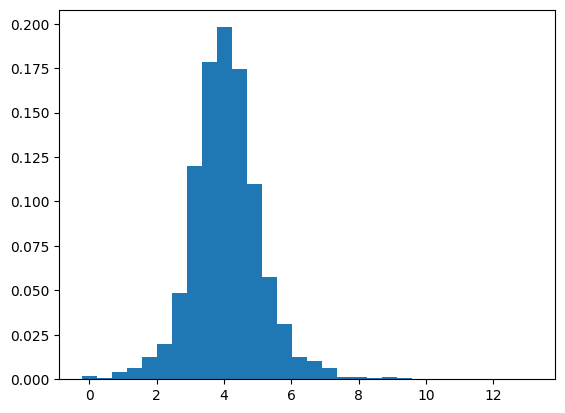

In [5]:
#plt.hist(var, density=True)
counts, bins = np.histogram(var, bins=30)
plt.bar(bins[:-1], counts / counts.sum(), width=np.diff(bins))

In [57]:
N = 100
klist = []
approx = 4
#var = np.round(var, approx)
bin_width = 10**(-(approx))
p_ground = compute_prob(var, bin_width)
#p_ground = compute_prob(m, bin_width)
#units_to_sample = 200
start, stop, step = (30, 45000, 500)
for N in range(start, stop, step):
    random_samples = np.random.choice(data.shape[0], N, replace=False)
    var_rs = np.var(data[random_samples,:], axis=0)
    #var_rs = np.var(data[random_samples,:units_to_sample], axis=0)
    #mean_rs = np.mean(data[random_samples,:], axis=0)
    #p_rs = compute_prob(mean_rs, bin_width)
    p_rs = compute_prob(var_rs, bin_width)
    k = kld_calc(p_ground, p_rs)
    klist.append(k)

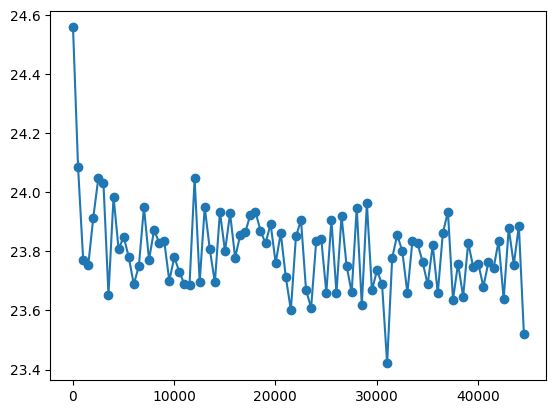

In [58]:
plt.plot(range(start, stop, step),klist, marker='o')

In [60]:
q75, q25 = np.percentile(data, [75 ,25])
iqr = q75 - q25

In [71]:
iqr_dist_list = []
mean_iqr = np.mean(iqr)
start, stop, step = (30, 10000, 100)
for N in range(start, stop, step):
    random_samples = np.random.choice(data.shape[0], N, replace=False)
    new_data = data[random_samples,:]
    new_q75, new_q25 = np.percentile(new_data, [75 ,25])
    new_iqr = np.mean(new_q75 - new_q25)
    #p_rs = compute_prob(mean_rs, bin_width)
    iqr_dist = np.abs((mean_iqr-new_iqr))
    iqr_dist_list.append(iqr_dist)

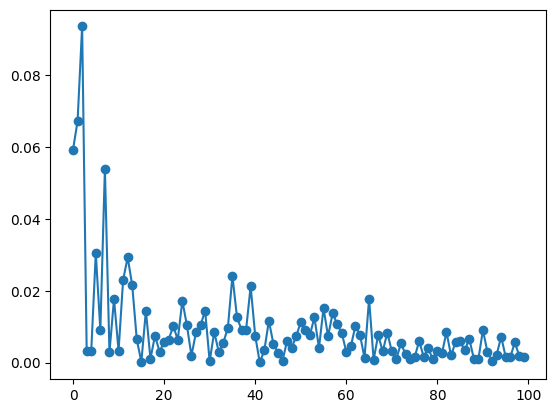

In [72]:
plt.plot(iqr_dist_list, marker="o")